# Importing Libraries

In [105]:
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
import pycountry

# Loading Data sets

In [76]:
data1 = pd.read_csv('../data/unicef_indicator_1.csv')
data2 = pd.read_csv('../data/unicef_indicator_2.csv')
metadata = pd.read_csv('../data/unicef_metadata.csv') 

# Basic Data Exploration

In [3]:
data1.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,Year,obs_value,sex,unit_of_measure,observation_status,current_age
0,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1990,7.857009,Female,"Deaths per 1,000 children aged 10",Normal value,Total
1,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1991,7.138557,Female,"Deaths per 1,000 children aged 10",Normal value,Total
2,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1992,6.470121,Female,"Deaths per 1,000 children aged 10",Normal value,Total
3,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1993,5.878975,Female,"Deaths per 1,000 children aged 10",Normal value,Total
4,Afghanistan,AF,AFG,4,Mortality rate age 10-14,1994,5.331355,Female,"Deaths per 1,000 children aged 10",Normal value,Total


In [4]:
data2.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex,unit_multiplier,unit_of_measure,observation_status,observation_confidentaility,time_period_activity_related_to_when_the_data_are_collected,current_age
0,Afghanistan,AF,AFG,4,Adolescent birth rate (number of live births t...,2002,12.3,Female,Units,Births per 1000 women,Reported,Free,End of fieldwork,10 to 14 years old
1,Afghanistan,AF,AFG,4,Adolescent birth rate (number of live births t...,2003,7.7,Female,Units,Births per 1000 women,Reported,Free,End of fieldwork,10 to 14 years old
2,Afghanistan,AF,AFG,4,Adolescent birth rate (number of live births t...,2005,8.2,Female,Units,Births per 1000 women,Reported,Free,End of fieldwork,10 to 14 years old
3,Afghanistan,AF,AFG,4,Adolescent birth rate (number of live births t...,2006,4.3,Female,Units,Births per 1000 women,Reported,Free,End of fieldwork,10 to 14 years old
4,Afghanistan,AF,AFG,4,Adolescent birth rate (number of live births t...,2008,1.4,Female,Units,Births per 1000 women,Reported,Free,End of fieldwork,10 to 14 years old


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19701 entries, 0 to 19700
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             19701 non-null  object 
 1   alpha_2_code        19602 non-null  object 
 2   alpha_3_code        19701 non-null  object 
 3   numeric_code        19701 non-null  int64  
 4   indicator           19701 non-null  object 
 5   Year                19701 non-null  int64  
 6   obs_value           19701 non-null  float64
 7   sex                 19701 non-null  object 
 8   unit_of_measure     19701 non-null  object 
 9   observation_status  19701 non-null  object 
 10  current_age         19701 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.7+ MB


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 14 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   country                                                      3343 non-null   object 
 1   alpha_2_code                                                 3335 non-null   object 
 2   alpha_3_code                                                 3343 non-null   object 
 3   numeric_code                                                 3343 non-null   int64  
 4   indicator                                                    3343 non-null   object 
 5   time_period                                                  3343 non-null   int64  
 6   obs_value                                                    3343 non-null   float64
 7   sex                                                          3343 non-null   o

# Visualizations

In [13]:
world = gpd.read_file('../data/shapefiles/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [107]:
def get_country_name(name):
    try:
        return pycountry.countries.lookup(name).name
    except LookupError:
        return name 

data1['country_standardized'] = data1['country'].apply(get_country_name)

In [44]:
merged = world.merge(data1, how="left", left_on="NAME", right_on="country_standardized")

In [45]:
missing = merged[merged['indicator'].isna()]
print("Missing countries after merge:")
print(missing['NAME'].tolist())


Missing countries after merge:
['Tanzania', 'W. Sahara', 'United States of America', 'Dem. Rep. Congo', 'Dominican Rep.', 'Russia', 'Falkland Is.', 'Greenland', 'Fr. S. Antarctic Lands', 'Bolivia', 'Venezuela', 'Puerto Rico', "Côte d'Ivoire", 'Central African Rep.', 'Eq. Guinea', 'eSwatini', 'Palestine', 'Laos', 'Vietnam', 'North Korea', 'South Korea', 'Iran', 'Syria', 'Moldova', 'New Caledonia', 'Solomon Is.', 'Taiwan', 'Antarctica', 'N. Cyprus', 'Libya', 'Somaliland', 'Bosnia and Herz.', 'North Macedonia', 'Kosovo', 'S. Sudan']


In [108]:
bins = [0, 5, 15, 30, 50, 1000]
labels = ['Very Low (0–5)', 'Low (5–15)', 'Moderate (15–30)', 'High (30–50)', 'Very High (50+)']

merged['mortality_bin'] = pd.cut(merged['obs_value'], bins=bins, labels=labels)

colors = ['#ffffb2', '#fecc5c', '#fd8d3c', '#f03b20', '#bd0026']  
cmap = mcolors.ListedColormap(colors)

bin_to_color = dict(zip(labels, range(len(labels))))
merged['bin_idx'] = merged['mortality_bin'].map(bin_to_color)

KeyError: 'obs_value'

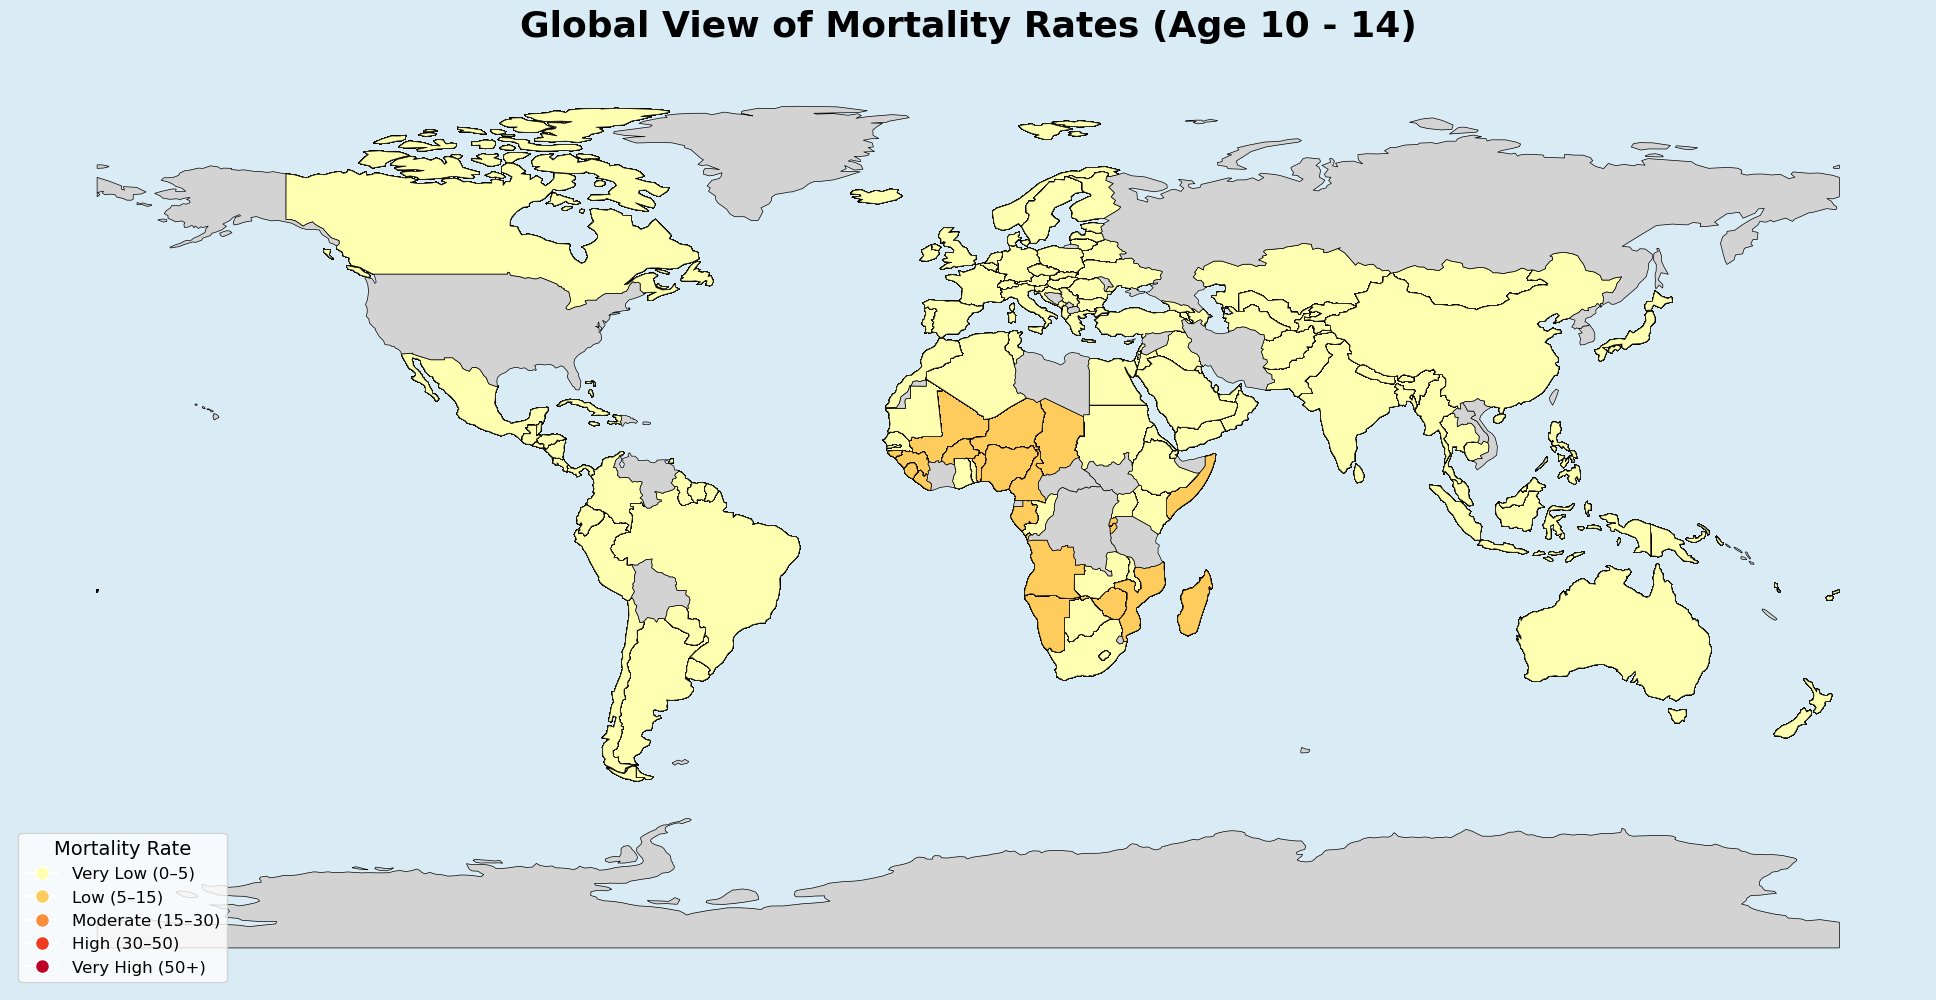

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

fig.patch.set_facecolor('#d9ebf5')
ax.set_facecolor('#d9ebf5')

merged.plot(
    column='bin_idx',
    cmap=cmap,
    linewidth=0.5,
    edgecolor='black',
    ax=ax,
    legend=False,
    missing_kwds={"color": "lightgrey", "label": "Missing Data"})

legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor=color, markersize=10) for label, color in zip(labels, colors)]
ax.legend(handles=legend_elements, title="Mortality Rate", loc='lower left', fontsize=12, title_fontsize=14)

ax.set_title('Global View of Mortality Rates (Age 10 - 14)', fontdict={'fontsize': 26, 'fontweight': 'bold'}, pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

In [109]:
data1['Year'] = pd.to_numeric(data1['Year'], errors='coerce')

selected_countries_from_dashboard = ['Rwanda', 'Burundi', 'Angola', 'Niger', 'Chad', 'Somalia']

data_selected = data1[data1['country'].isin(selected_countries_from_dashboard)]

mortality_trend = data_selected.groupby(['Year', 'country'])['obs_value'].mean().reset_index()

In [66]:
high_income_countries = [
    'United States', 'Canada', 'Germany', 'France', 'United Kingdom',
    'Japan', 'Australia', 'Switzerland', 'Sweden', 'Norway', 'Denmark',
    'Netherlands', 'Austria', 'Finland', 'Ireland', 'Singapore', 'South Korea',
    'Belgium', 'New Zealand', 'Italy', 'Spain', 'Luxembourg'
]

filtered_data = data1[data1['country'].isin(high_income_countries)]

filtered_data = filtered_data.sort_values(['country', 'Year'], ascending=[True, False]).drop_duplicates('country')

filtered_data = filtered_data.sort_values('obs_value', ascending=True)

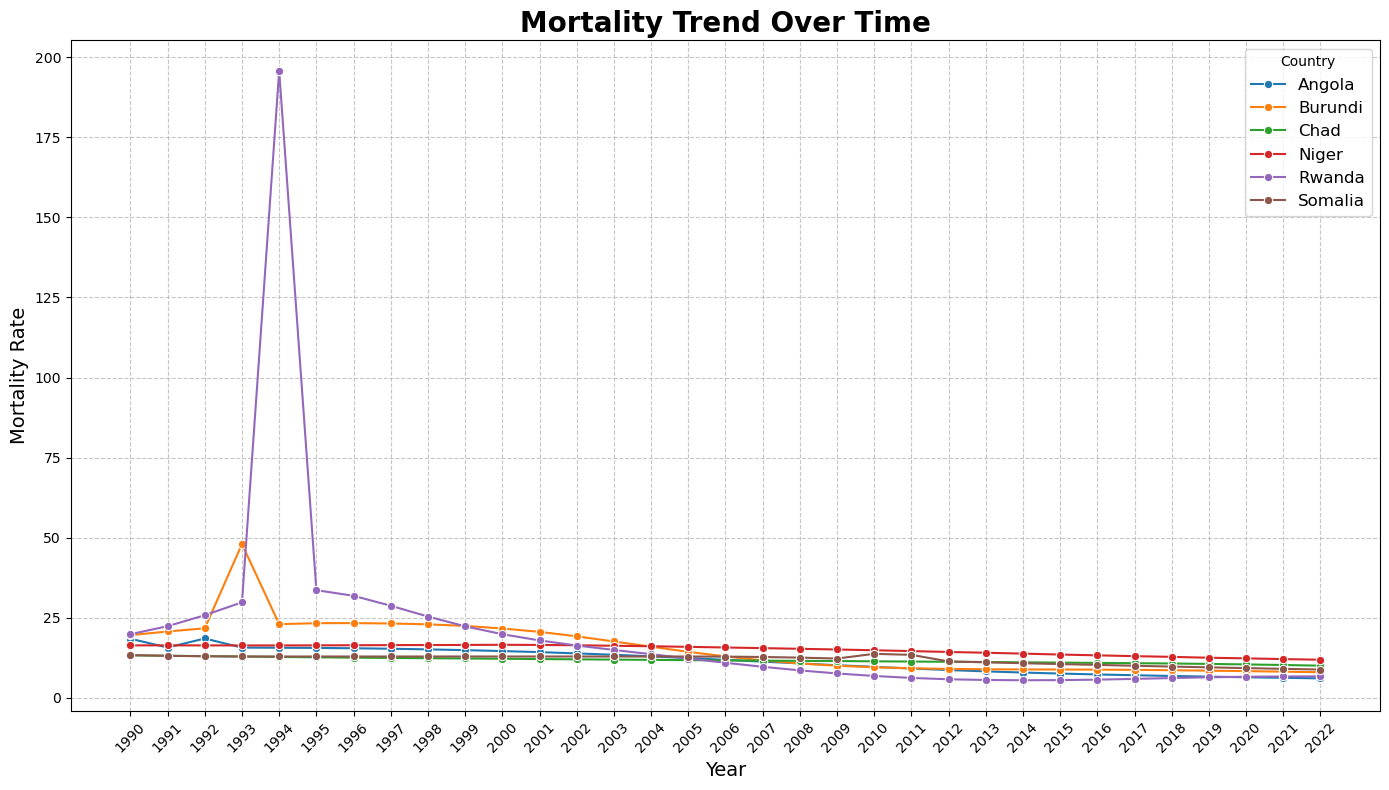

In [110]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=mortality_trend, x='Year', y='obs_value', hue='country', marker='o')

plt.title('Mortality Trend Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(mortality_trend['Year'].unique(), rotation=45)
plt.legend(title='Country', fontsize=12)
plt.tight_layout()


plt.show()

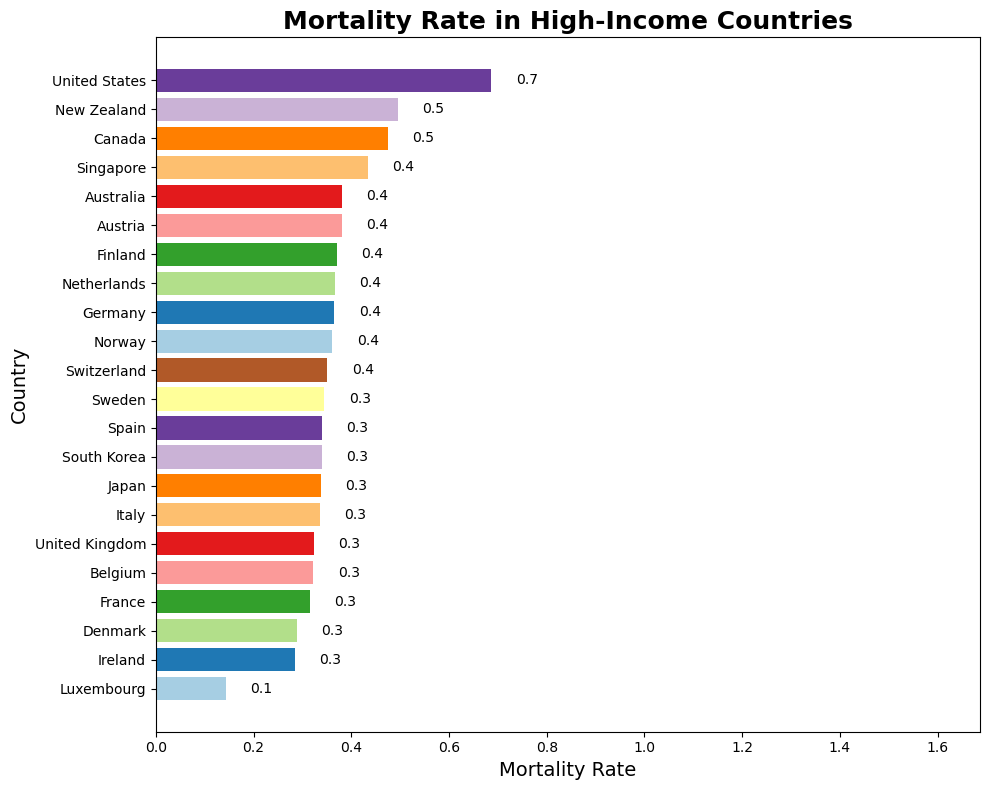

In [67]:

plt.figure(figsize=(10, 8))
bars = plt.barh(filtered_data['country'], filtered_data['obs_value'], color=plt.cm.Paired.colors)

plt.title('Mortality Rate in High-Income Countries', fontsize=18, weight='bold')
plt.xlabel('Mortality Rate', fontsize=14)
plt.ylabel('Country', fontsize=14)


for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05,                      
             bar.get_y() + bar.get_height()/2,
             f'{width:.1f}',
             va='center', ha='left', fontsize=10)

plt.xlim(0, filtered_data['obs_value'].max() + 1)

plt.tight_layout()
plt.show()

In [90]:
merged_data = pd.merge(
    data1, 
    metadata, 
    how='left', 
    left_on='country', 
    right_on='country'
)


In [102]:
def make_regression_plot(x_column, y_column='obs_value', dataset=merged_data, title=None):
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=x_column,
        y=y_column,
        data=dataset.dropna(subset=[x_column, y_column]),
        scatter_kws={'s': 50, 'alpha': 0.7},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    plt.title(title if title else f'{x_column} vs {y_column}', fontsize=18, weight='bold')
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

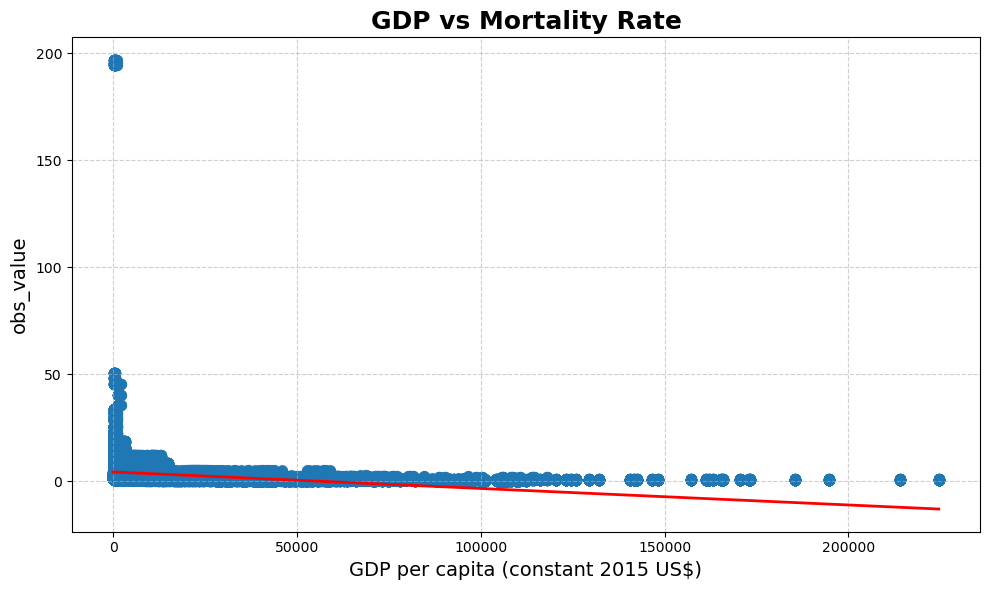

In [104]:
make_regression_plot('GDP per capita (constant 2015 US$)', title='GDP vs Mortality Rate')